Dataset loaded successfully
Shape: (4048, 112)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB

Missing Values (%):
P_DETECTION_MASS          100.000000
P_GEO_ALBEDO              100.000000
S_MAGNETIC_FIELD          100.000000
S_DISC                    100.000000
P_ATMOSPHERE              100.000000
P_ALT_NAMES               100.000000
P_DETECTION_RADIUS        100.000000
P_GEO_ALBEDO_ERROR_MIN     99.876482
P_TEMP_MEASURED            99.876482
P_GEO_ALBEDO_ERROR_MAX     99.876482
dtype: float64

Missing values after imputation:
28336
Imputed dataset saved as imputed_exoplanet_dataset.csv


,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4.048000e+03,4.048000e+03,...,4048.000000,4.048000e+03,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000
mean,3.0,480.603433,-70.592039,84.970304,3.773810,-0.426082,0.552732,2014.212945,2.246911e+03,-1.009711e+03,...,3.452200,1.347282e+35,0.441667,0.049654,0.034091,0.021986,0.262055,5.588647,323.089993,3.943785
std,0.0,920.253565,475.489557,656.080848,4.277302,1.238481,1.762677,3.704839,1.151048e+05,5.763562e+04,...,5.288483,6.060523e+36,0.066955,0.217256,0.181485,0.195731,0.125944,5.392733,965.084290,61.850142
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,273.332080,-24.154928,25.108412,1.759970,-0.414770,0.201780,2014.000000,4.610251e+00,-9.210750e-04,...,1.797510,7.410581e-01,0.431567,0.000000,0.000000,0.000000,0.209726,1.703920,3.628101,0.053931
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,273.332080,-24.154928,25.108412,2.937020,-0.156940,0.518463,2016.000000,4.011097e+01,-1.898750e-05,...,3.582641,2.162490e+00,0.462869,0.000000,0.000000,0.000000,0.299152,11.770500,149.379160,0.255500
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


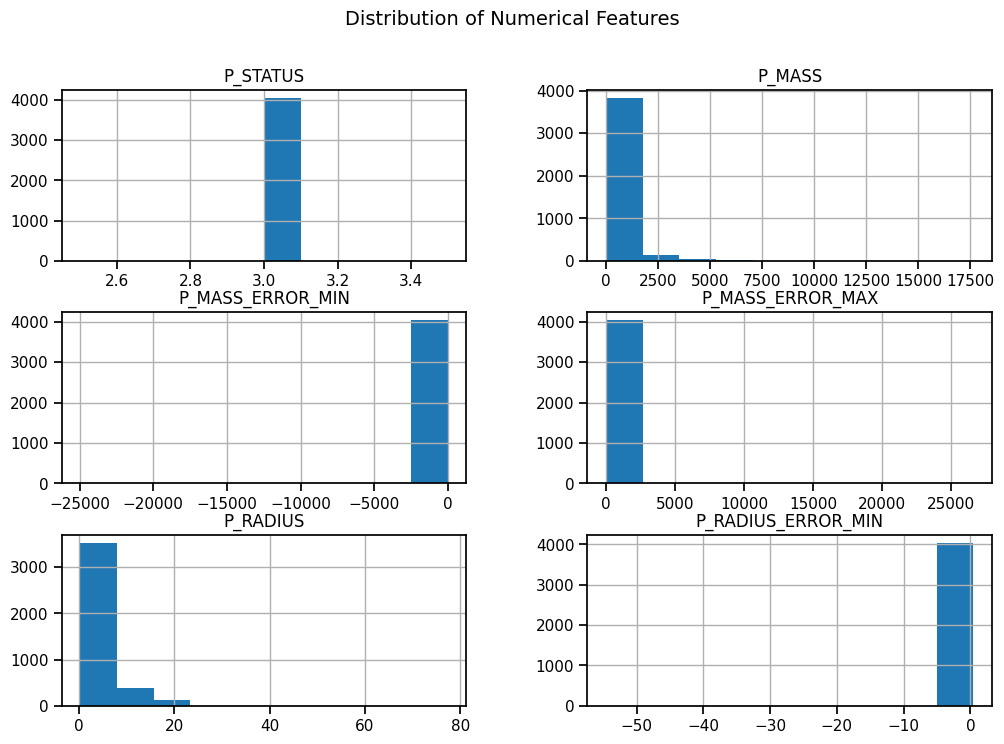

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


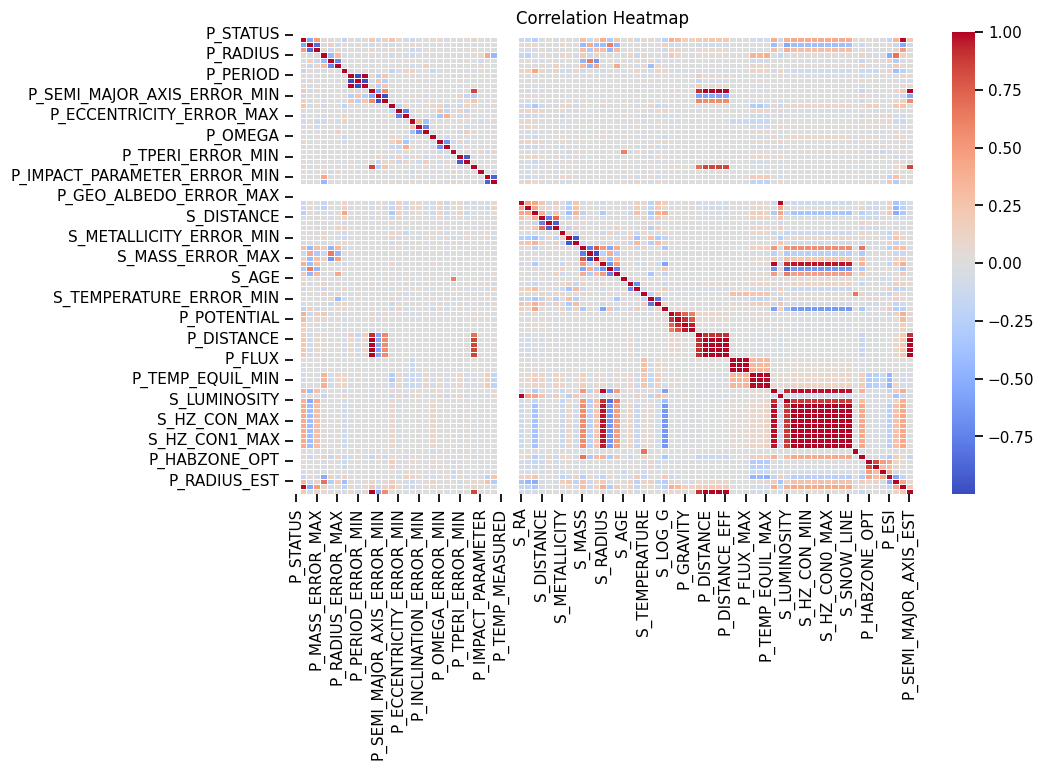

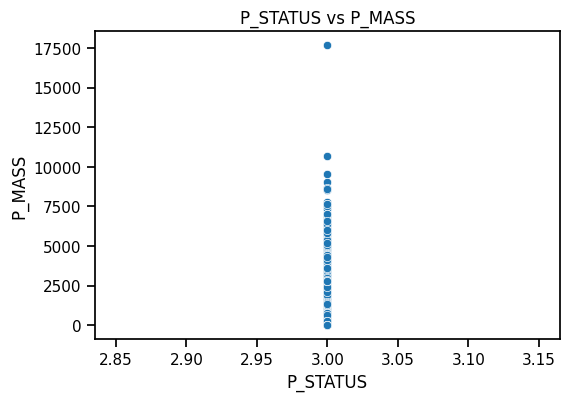


Key Insights:
- Dataset contains both numerical and categorical features
- Missing values were successfully handled using median and mode imputation
- Some numerical features show strong correlations
- Data is suitable for further ML or statistical analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")


data_path = "/kaggle/input/phl-exoplanet-catalog/phl_exoplanet_catalog_2019.csv"

df = pd.read_csv(data_path)

print("Dataset loaded successfully")
print("Shape:", df.shape)


print("\nDataset Info:")
df.info()

print("\nMissing Values (%):")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False).head(10))


num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

df.to_csv("imputed_exoplanet_dataset.csv", index=False)
print("Imputed dataset saved as imputed_exoplanet_dataset.csv")


display(df.describe())


df[num_cols[:6]].hist(figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()
plt.figure(figsize=(10, 6))

df_clean = df[num_cols].replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna(axis=1, how="all")
corr = df_clean.corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()


print("\nKey Insights:")
print("- Dataset contains both numerical and categorical features")
print("- Missing values were successfully handled using median and mode imputation")
print("- Some numerical features show strong correlations")
print("- Data is suitable for further ML or statistical analysis")